In [1]:
import tensorflow as tf
import tensorflow_io as tfio
from IPython.display import Audio
import matplotlib.pyplot as plt

2025-10-29 12:44:07.662069: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-29 12:44:07.663009: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-29 12:44:07.665500: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-29 12:44:07.672381: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-29 12:44:07.686863: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [ ]:
# Import audio file
audio = tfio.audio.AudioIOTensor("../data/Piotr Ilich Tchaikovsky - 1812 Overture (Finale).mp3")
print(audio)

# Convert to mono tensor, normalize and slice

 # convert to mono if stereo
audio_tensor = tf.reduce_mean(audio.to_tensor(), axis=1)

 # convert to float and divide if not normalized
# audio_tensor = tf.cast(audio_tensor, tf.float32) / 32768.0 
 # turn flat if needed
# audio_tensor = tf.squeeze(audio_tensor, axis=-1)

 # take a slice
audio_slice = audio_tensor[audio.rate*185:audio.rate*195]
print(audio_slice)

# Play audio
Audio(audio_slice.numpy(), rate=audio.rate.numpy())

2025-10-29 12:44:09.116465: I tensorflow_io/core/kernels/cpu_check.cc:128] Your CPU supports instructions that this TensorFlow IO binary was not compiled to use: SSE3 SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
2025-10-29 12:44:09.210876: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-10-29 12:44:09.211438: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


<AudioIOTensor: shape=[11072512        2], dtype=<dtype: 'float32'>, rate=44100>
tf.Tensor(
[ 0.04816649  0.05519237  0.06316426 ...  0.05008778 -0.00176067
 -0.04969308], shape=(441000,), dtype=float32)


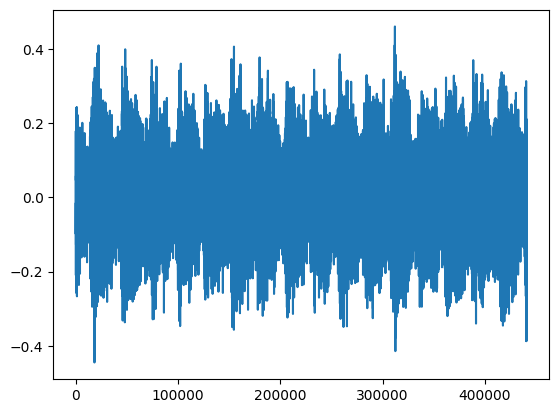

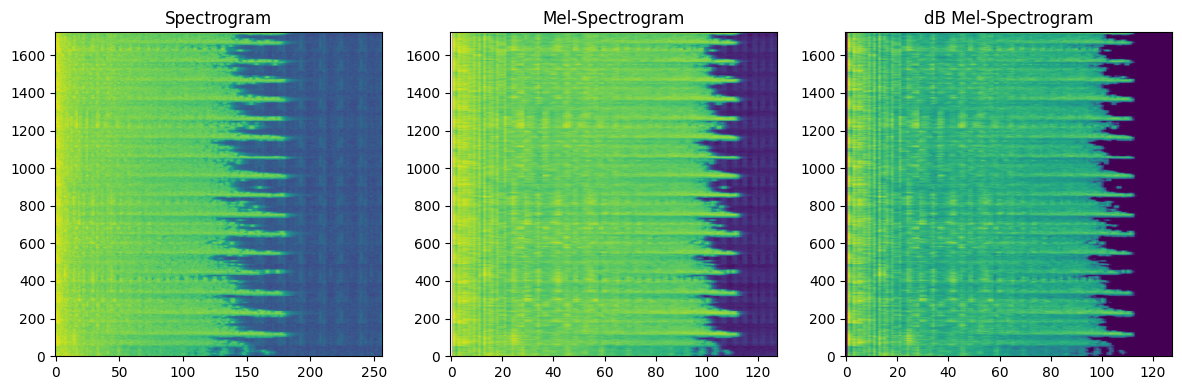

In [3]:
def plot_graphs(audio):
    # Audio waves
    plt.figure()
    plt.plot(audio.numpy())
    plt.show()


    # Spectrograms
    spectrogram = tfio.audio.spectrogram(
        audio, nfft=512, window=512, stride=256)

    mel_spectrogram = tfio.audio.melscale(
        spectrogram, rate=16000, mels=128, fmin=0, fmax=8000)

    dbscale_mel_spectrogram = tfio.audio.dbscale(
        mel_spectrogram, top_db=80)


    fig, axs = plt.subplots(1, 3, figsize=(12, 4))  # 1 row, 3 columns

    # Original spectrogram
    axs[0].imshow(tf.math.log(spectrogram).numpy(), aspect='auto', origin='lower')
    axs[0].set_title("Spectrogram")

    # Mel-spectrogram
    axs[1].imshow(tf.math.log(mel_spectrogram).numpy(), aspect='auto', origin='lower')
    axs[1].set_title("Mel-Spectrogram")

    # dB scale mel-spectrogram
    axs[2].imshow(dbscale_mel_spectrogram.numpy(), aspect='auto', origin='lower')
    axs[2].set_title("dB Mel-Spectrogram")


    plt.tight_layout()
    plt.show()

plot_graphs(audio_slice)

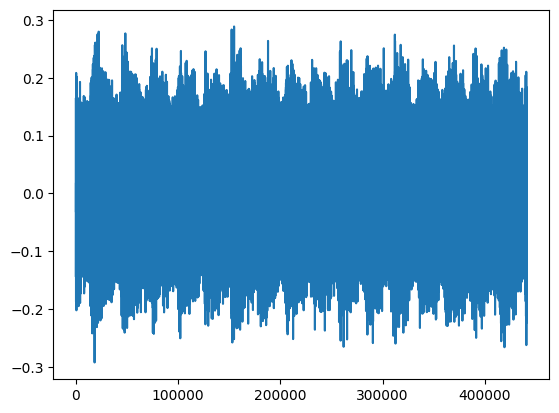

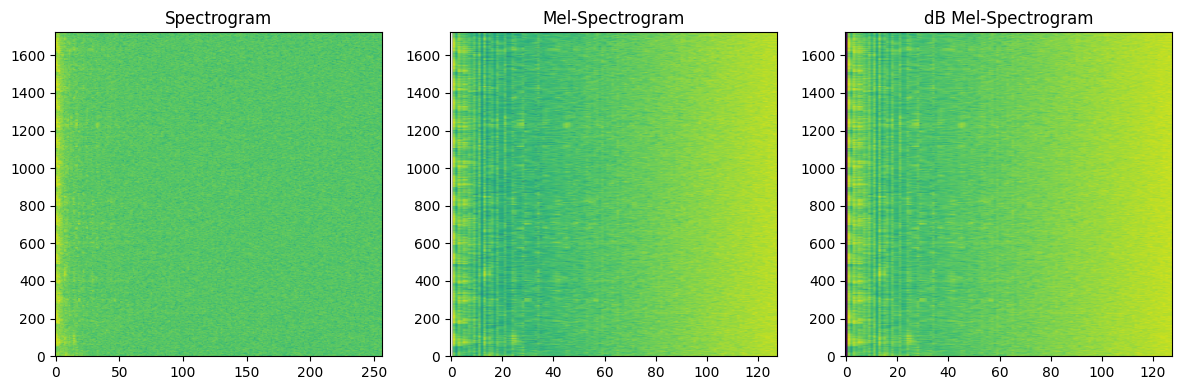

In [8]:
# Random noise generator using Gaussian distribution with max value 0.2
noisy_slice = (audio_slice + tf.random.uniform(audio_slice.shape, minval=-0.2,maxval=0.2))/2
display(Audio(noisy_slice.numpy(), rate=audio.rate.numpy()))

plot_graphs(noisy_slice)